# Open Bus Stations Data Exploration

In [1]:
# Loading libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Importing processed csv into dataframe
stations_raw = pd.read_csv("allstations_processed.csv")
stations = stations_raw.copy()
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35143886 entries, 0 to 35143885
Data columns (total 14 columns):
dock_id             int64
dock_name           object
date                object
hour                int64
minute              int64
avail_bikes         int64
avail_docks         int64
tot_docks           int64
_lat                float64
_long               float64
depletion_status    object
time                object
dayofweek           int64
season              object
dtypes: float64(2), int64(7), object(5)
memory usage: 3.7+ GB


In [3]:
stations['date'] = pd.to_datetime(stations['date'])

## Data Visualizations

In [4]:
daily_bikes = stations.drop(columns=['dock_name', 'hour', 'minute', '_lat', '_long',\
                                     'depletion_status', 'time', 'dayofweek', 'season'])
daily_bikes['year_month'] = daily_bikes['date'].dt.strftime('%Y-%m')

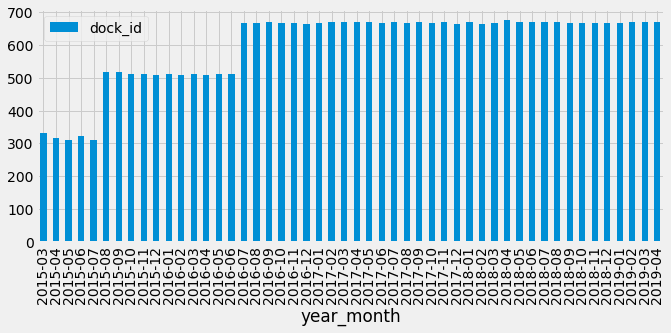

In [5]:
#Chart to show the growth of unique bike stations over time by month 
daily_bikes.groupby('year_month').agg({'dock_id':pd.Series.nunique}).plot(kind='bar', figsize=(10,4))

In [6]:
daily_bikes_df = daily_bikes.groupby('year_month').agg({'avail_bikes':'mean', 'avail_docks':'mean','tot_docks':'mean'}).reset_index()
daily_bikes_df.rename(columns={'avail_bikes':'Bikes_Avail', 'avail_docks':'Bikes_Used','tot_docks':'Docks'}, inplace=True)

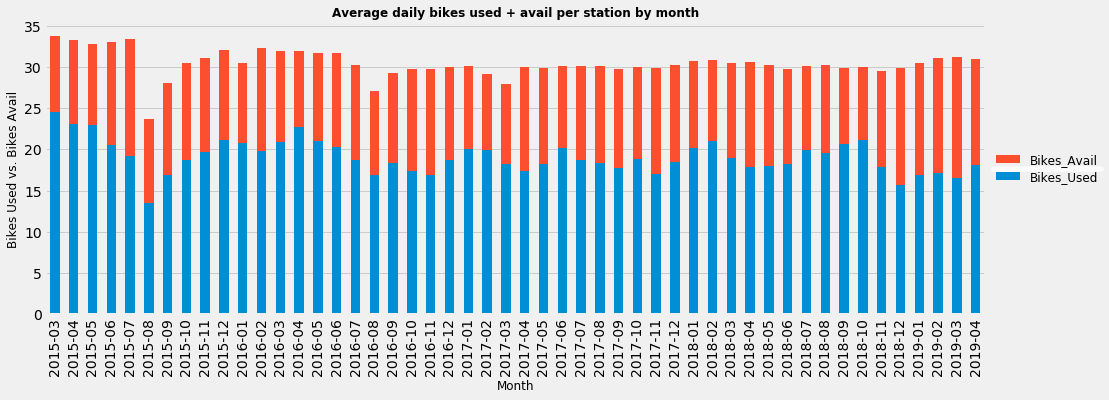

In [7]:
fig, ax = plt.subplots()
daily_bikes_df.plot(kind='bar', stacked=True, y=['Bikes_Used','Bikes_Avail'],\
                    x='year_month', ax=ax, figsize=(15,5))
ax.set_title('Average daily bikes used + avail per station by month', fontsize=12, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Bikes Used vs. Bikes Avail', fontsize=12)
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1,0.5), labelspacing=-2.5,\
          facecolor='white', edgecolor='white')
ax.xaxis.grid(False)

(0.4, 0.8)

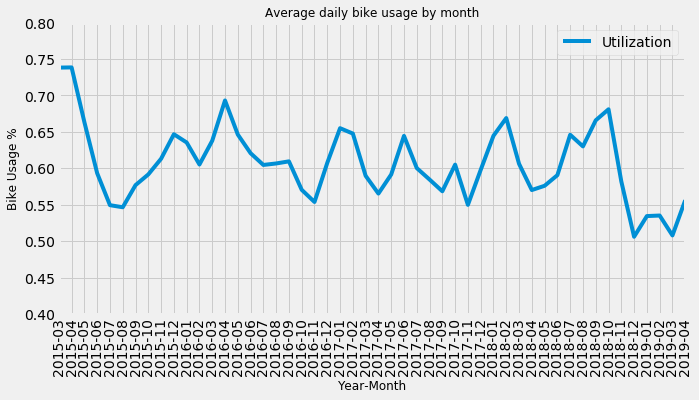

In [10]:
daily_bikes_df['Utilization'] = daily_bikes_df['Bikes_Used']/(daily_bikes_df['Docks'])

fig, ax = plt.subplots()
daily_bikes_df.plot(kind='line', x='year_month', y='Utilization', ax=ax, figsize=(10,5))
ax.set_title('Average daily bike usage by month', fontsize=12)
#ax.set_title('Average daily bike usage by month', fontsize=12, fontweight='bold')
ax.set_xlabel('Year-Month', fontsize=12)
ax.set_ylabel('Bike Usage %', fontsize=12)
ax.set_xticks(np.arange(len(daily_bikes_df['year_month'])))
ax.set_xticklabels(daily_bikes_df['year_month'], rotation=90)
plt.ylim((0.4,0.8))

In [11]:
#simple func to add 0 to hour in 'time' column to standardize and sort (example: 1:30 -> 01:30)
import re

def add_zero(time):
    hour = time.split(':')[0]
    minute = time.split(':')[1]
    if len(hour) < 2:
        return '0'+hour+':'+minute
    else:
        return time

### Examining hourly trends on bike vs. docks for entire dataset

In [12]:
time_df = stations.drop(columns=['dock_id', 'date', 'dock_name', 'hour', 'minute', '_lat', '_long',\
                                     'depletion_status', 'dayofweek', 'season'])
time_df = time_df.groupby('time').agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
time_df.rename(columns={'avail_bikes':'Bikes_Avail', 'avail_docks':'Bikes_Used', 'tot_docks':'Docks'}, inplace=True)
time_df['time'] = time_df['time'].map(add_zero)
time_df.sort_values('time', ascending=True, inplace=True)
time_df['Utilization'] = time_df['Bikes_Used']/(time_df['Docks'])

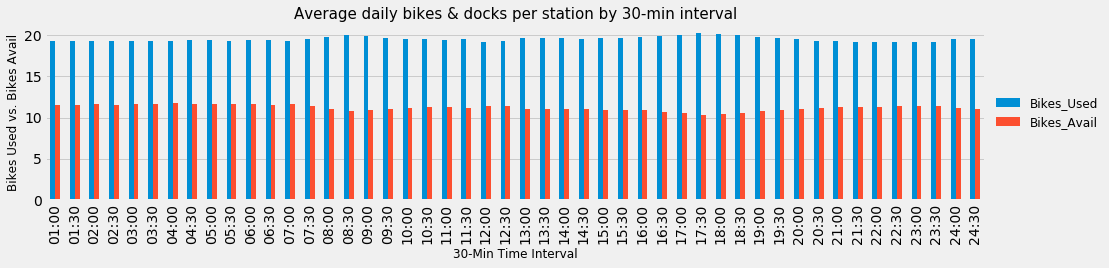

In [13]:
fig, ax = plt.subplots()
time_df.plot(kind='bar', stacked=False, y=['Bikes_Used','Bikes_Avail'],\
                    x='time', ax=ax, figsize=(15,3))
ax.set_title('Average daily bikes & docks per station by 30-min interval', fontsize=15)
ax.set_xlabel('30-Min Time Interval', fontsize=12)
ax.set_ylabel('Bikes Used vs. Bikes Avail', fontsize=12)
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1,0.5), frameon=False)
# ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1,0.5), labelspacing=-2.5,\
#           facecolor='white', edgecolor='white')
ax.xaxis.grid(False)

(0.58, 0.66)

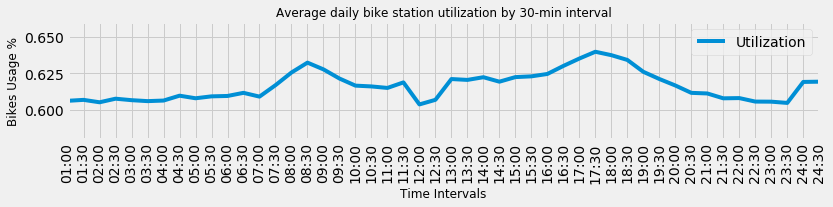

In [14]:
fig, ax = plt.subplots()
time_df.plot(kind='line', x='time', y='Utilization', ax=ax, figsize=(12,2))
ax.set_title('Average daily bike station utilization by 30-min interval', fontsize=12)
ax.set_xlabel('Time Intervals', fontsize=12)
ax.set_ylabel('Bikes Usage %', fontsize=12)
ax.set_xticks(np.arange(len(time_df['time'])))
ax.set_xticklabels(time_df['time'], rotation=90)
plt.ylim((0.58,0.66))

### Weekdays only (Mon-Fri) for entire dataset

In [15]:
weekdays = stations[~stations['dayofweek'].isin([5,6])]
weekdays = weekdays.drop(columns=['dock_id', 'date', 'dock_name', 'hour', 'minute', '_lat', '_long',\
                                     'depletion_status', 'dayofweek', 'season'])
weekdays = weekdays.groupby('time').agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
weekdays.rename(columns={'avail_bikes':'Bikes_Avail', 'avail_docks':'Bikes_Used', 'tot_docks':'Docks'}, inplace=True)
weekdays['time'] = weekdays['time'].map(add_zero)
weekdays.sort_values('time', ascending=True, inplace=True)
weekdays['Utilization'] = weekdays['Bikes_Used']/(weekdays['Docks'])

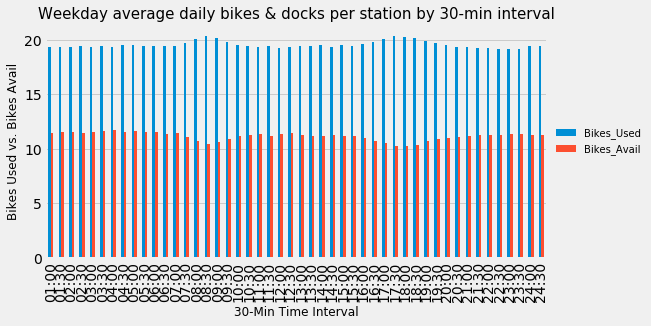

In [16]:
fig, ax = plt.subplots()
weekdays.plot(kind='bar', stacked=False, y=['Bikes_Used','Bikes_Avail'],\
                    x='time', ax=ax, figsize=(8,4))
ax.set_title('Weekday average daily bikes & docks per station by 30-min interval', fontsize=15)
ax.set_xlabel('30-Min Time Interval', fontsize=12)
ax.set_ylabel('Bikes Used vs. Bikes Avail', fontsize=12)
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1,0.5), frameon=False)
#ax.legend(fontsize=10)
ax.xaxis.grid(False)

(0.56, 0.68)

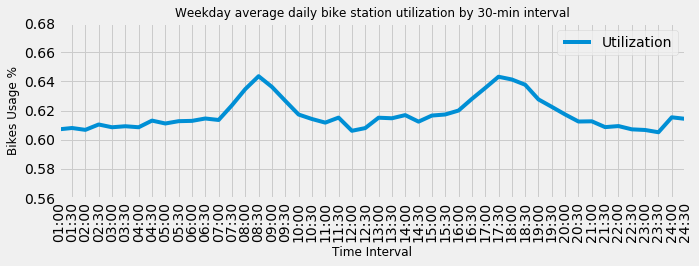

In [17]:
fig, ax = plt.subplots()
weekdays.plot(kind='line', x='time', y='Utilization', ax=ax, figsize=(10,3))
ax.set_title('Weekday average daily bike station utilization by 30-min interval', fontsize=12)
ax.set_xlabel('Time Interval', fontsize=12)
ax.set_ylabel('Bikes Usage %', fontsize=12)
ax.set_xticks(np.arange(len(weekdays['time'])))
ax.set_xticklabels(weekdays['time'], rotation=90)
plt.ylim((0.56,0.68))

### Weekends only (Saturday & Sunday) on entire dataset

In [18]:
weekends = stations[stations['dayofweek'].isin([5,6])]
weekends = weekends.drop(columns=['dock_id', 'date', 'dock_name', 'hour', 'minute', '_lat', '_long',\
                                     'depletion_status', 'dayofweek', 'season'])
weekends = weekends.groupby('time').agg({'avail_bikes':'mean', 'avail_docks':'mean', 'tot_docks':'mean'}).reset_index()
weekends.rename(columns={'avail_bikes':'Bikes_Avail', 'avail_docks':'Bikes_Used', 'tot_docks':'Docks'}, inplace=True)
weekends['time'] = weekends['time'].map(add_zero)
weekends.sort_values('time', ascending=True, inplace=True)
weekends['Utilization'] = weekends['Bikes_Used']/(weekends['Docks'])

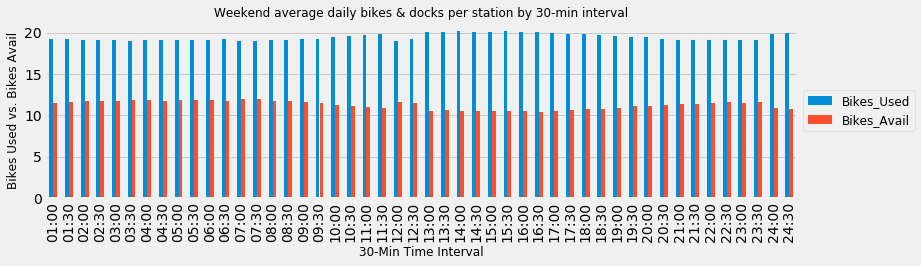

In [19]:
fig, ax = plt.subplots()
weekends.plot(kind='bar', stacked=False, y=['Bikes_Used','Bikes_Avail'],\
                    x='time', ax=ax, figsize=(12,3))
ax.set_title('Weekend average daily bikes & docks per station by 30-min interval', fontsize=12)
ax.set_xlabel('30-Min Time Interval', fontsize=12)
ax.set_ylabel('Bikes Used vs. Bikes Avail', fontsize=12)
ax.legend(fontsize=12, loc='center left', bbox_to_anchor=(1,0.5))
ax.xaxis.grid(False)

(0.56, 0.68)

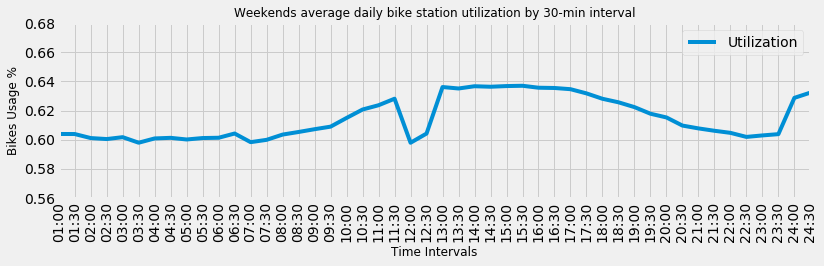

In [20]:
fig, ax = plt.subplots()
weekends.plot(kind='line', x='time', y='Utilization', ax=ax, figsize=(12,3))
ax.set_title('Weekends average daily bike station utilization by 30-min interval', fontsize=12)
ax.set_xlabel('Time Intervals', fontsize=12)
ax.set_ylabel('Bikes Usage %', fontsize=12)
ax.set_xticks(np.arange(len(weekends['time'])))
ax.set_xticklabels(weekends['time'], rotation=90)
plt.ylim((0.56,0.68))

### Weekdays vs. Weekends hourly usage

In [21]:
weekdays1 = weekdays.rename(columns={'Utilization':'Weekday'})
weekdays1.drop(['Bikes_Avail','Bikes_Used','Docks'], axis=1, inplace=True)
weekends1 = weekends.rename(columns={'Utilization':'Weekend'})
weekends1.drop(['Bikes_Avail','Bikes_Used','Docks','time'], axis=1, inplace=True)
util_comparison = pd.concat([weekdays1, weekends1], axis=1)

(0.56, 0.68)

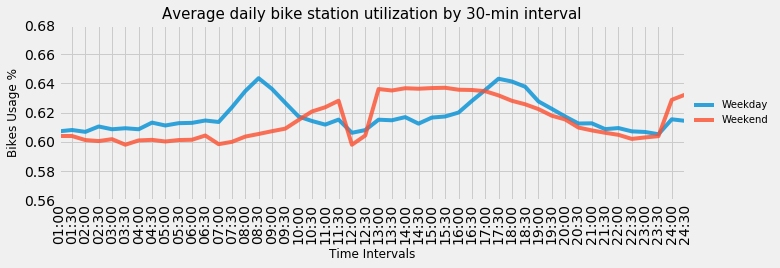

In [22]:
fig, ax = plt.subplots()
util_comparison.plot(kind='line', x='time', y=['Weekday','Weekend'], ax=ax, figsize=(10,3), alpha=0.8)
ax.set_title('Average daily bike station utilization by 30-min interval', fontsize=15)
ax.set_xlabel('Time Intervals', fontsize=12)
ax.set_ylabel('Bikes Usage %', fontsize=12)
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(1,0.5), frameon=False)
ax.set_xticks(np.arange(len(weekends['time'])))
ax.set_xticklabels(weekends['time'], rotation=90)
plt.ylim((0.56,0.68))

### Seasonal usage for Weekdays only

In [23]:
wkdy_season = stations[~stations['dayofweek'].isin([5,6])]
wkdy_season = wkdy_season.drop(columns=['dock_id', 'dock_name', 'date', 'hour', 'minute', '_lat', '_long',\
                                     'depletion_status', 'dayofweek'])
wkdy_season = wkdy_season.groupby(['time', 'season']).agg({'avail_bikes':'mean', 'avail_docks':'mean',\
                                                           'tot_docks':'mean'}).reset_index()
wkdy_season.rename(columns={'avail_bikes':'Bikes_Avail', 'avail_docks':'Bikes_Used', 'tot_docks':'Docks'},\
                   inplace=True)
wkdy_season['time'] = wkdy_season['time'].map(add_zero)
wkdy_season.sort_values('time', ascending=True, inplace=True)
wkdy_season['Utilization'] = wkdy_season['Bikes_Used']/(wkdy_season['Docks'])

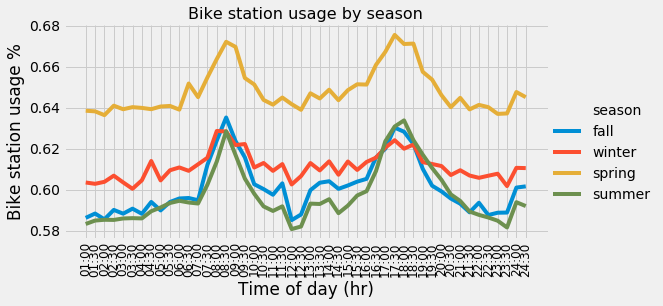

In [24]:
g = sns.relplot(x="time", y="Utilization", data=wkdy_season, hue="season", kind="line", height=4, aspect=2)
plt.title('Bike station usage by season', fontsize=16)
plt.xlabel('Time of day (hr)')
plt.ylabel('Bike station usage %')
g.set_xticklabels(rotation=90, fontsize=12)